Question 1: What is Simple Linear Regression?


=> The goal is to find a straight-line relationship between X and Y, which can be used to predict the value of Y based on X.


Question 2: What are the key assumptions of Simple Linear Regression?


=> For the model to produce reliable and accurate predictions, certain assumptions must be satisfied. These are:

Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

=> Ignoring heteroscedasticity can lead to incorrect conclusions about the relationship between variables. Addressing it ensures that the regression model’s estimates and inference are trustworthy and valid.

Question 4: What is Multiple Linear Regression?


=> Multiple Linear Regression (MLR) is an extension of Simple Linear Regression that allows you to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, ...).

Question 5: What is polynomial regression, and how does it differ from linear
regression?

=> Polynomial Regression is a type of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled as an n-th degree polynomial.

Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.

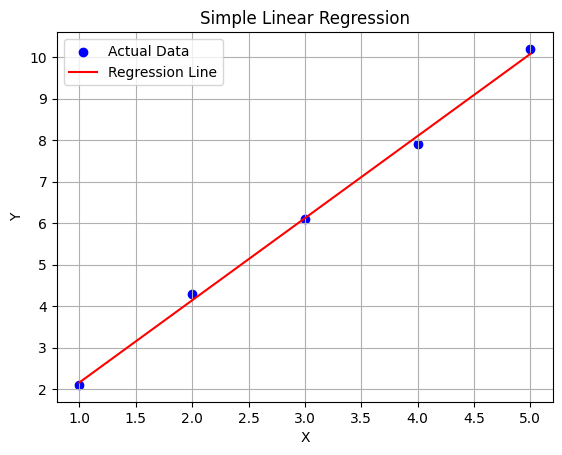

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Actual Data')

plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Area', 'Rooms']]
Y = df['Price']

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, Y)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Checking for multicollinearity using VIF
# Add a constant term for intercept
X_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF):
  Feature       VIF
0    Area  7.736842
1   Rooms  7.736842


Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.

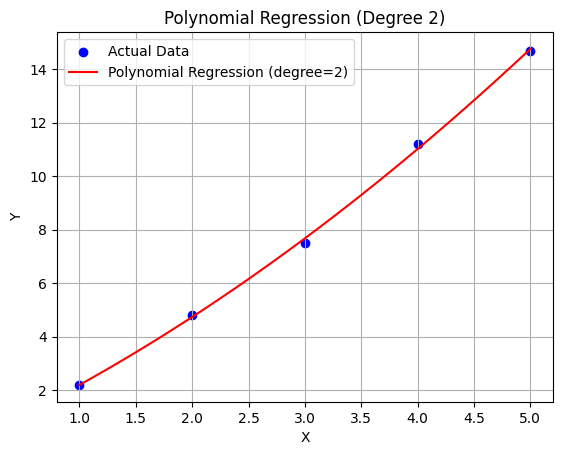

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue', label='Actual Data')

X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_range_pred = model.predict(X_range_poly)

plt.plot(X_range, Y_range_pred, color='red', label='Polynomial Regression (degree=2)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

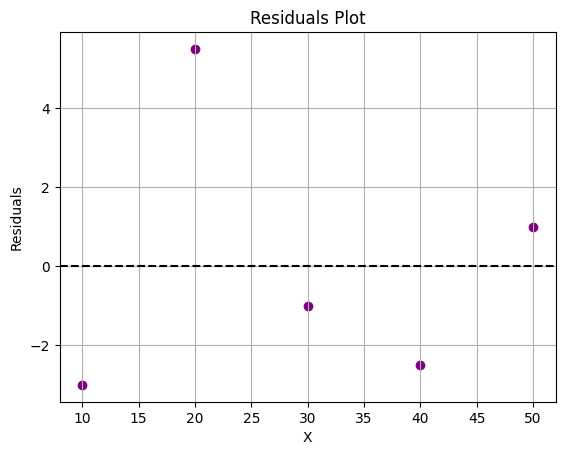

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


=> As a data scientist working on predicting house prices using features like area, number of rooms, and location, detecting both heteroscedasticity and multicollinearity indicates that the model’s assumptions are being violated. Here’s how I would approach solving these issues to ensure the model is robust and reliable: